In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
data=pd.read_csv('creditcard.csv')
data.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### EDA

In [ ]:
data['Class'].value_counts()    #shows that the dataset is highly skewed

Class
0    284315
1       492
Name: count, dtype: int64

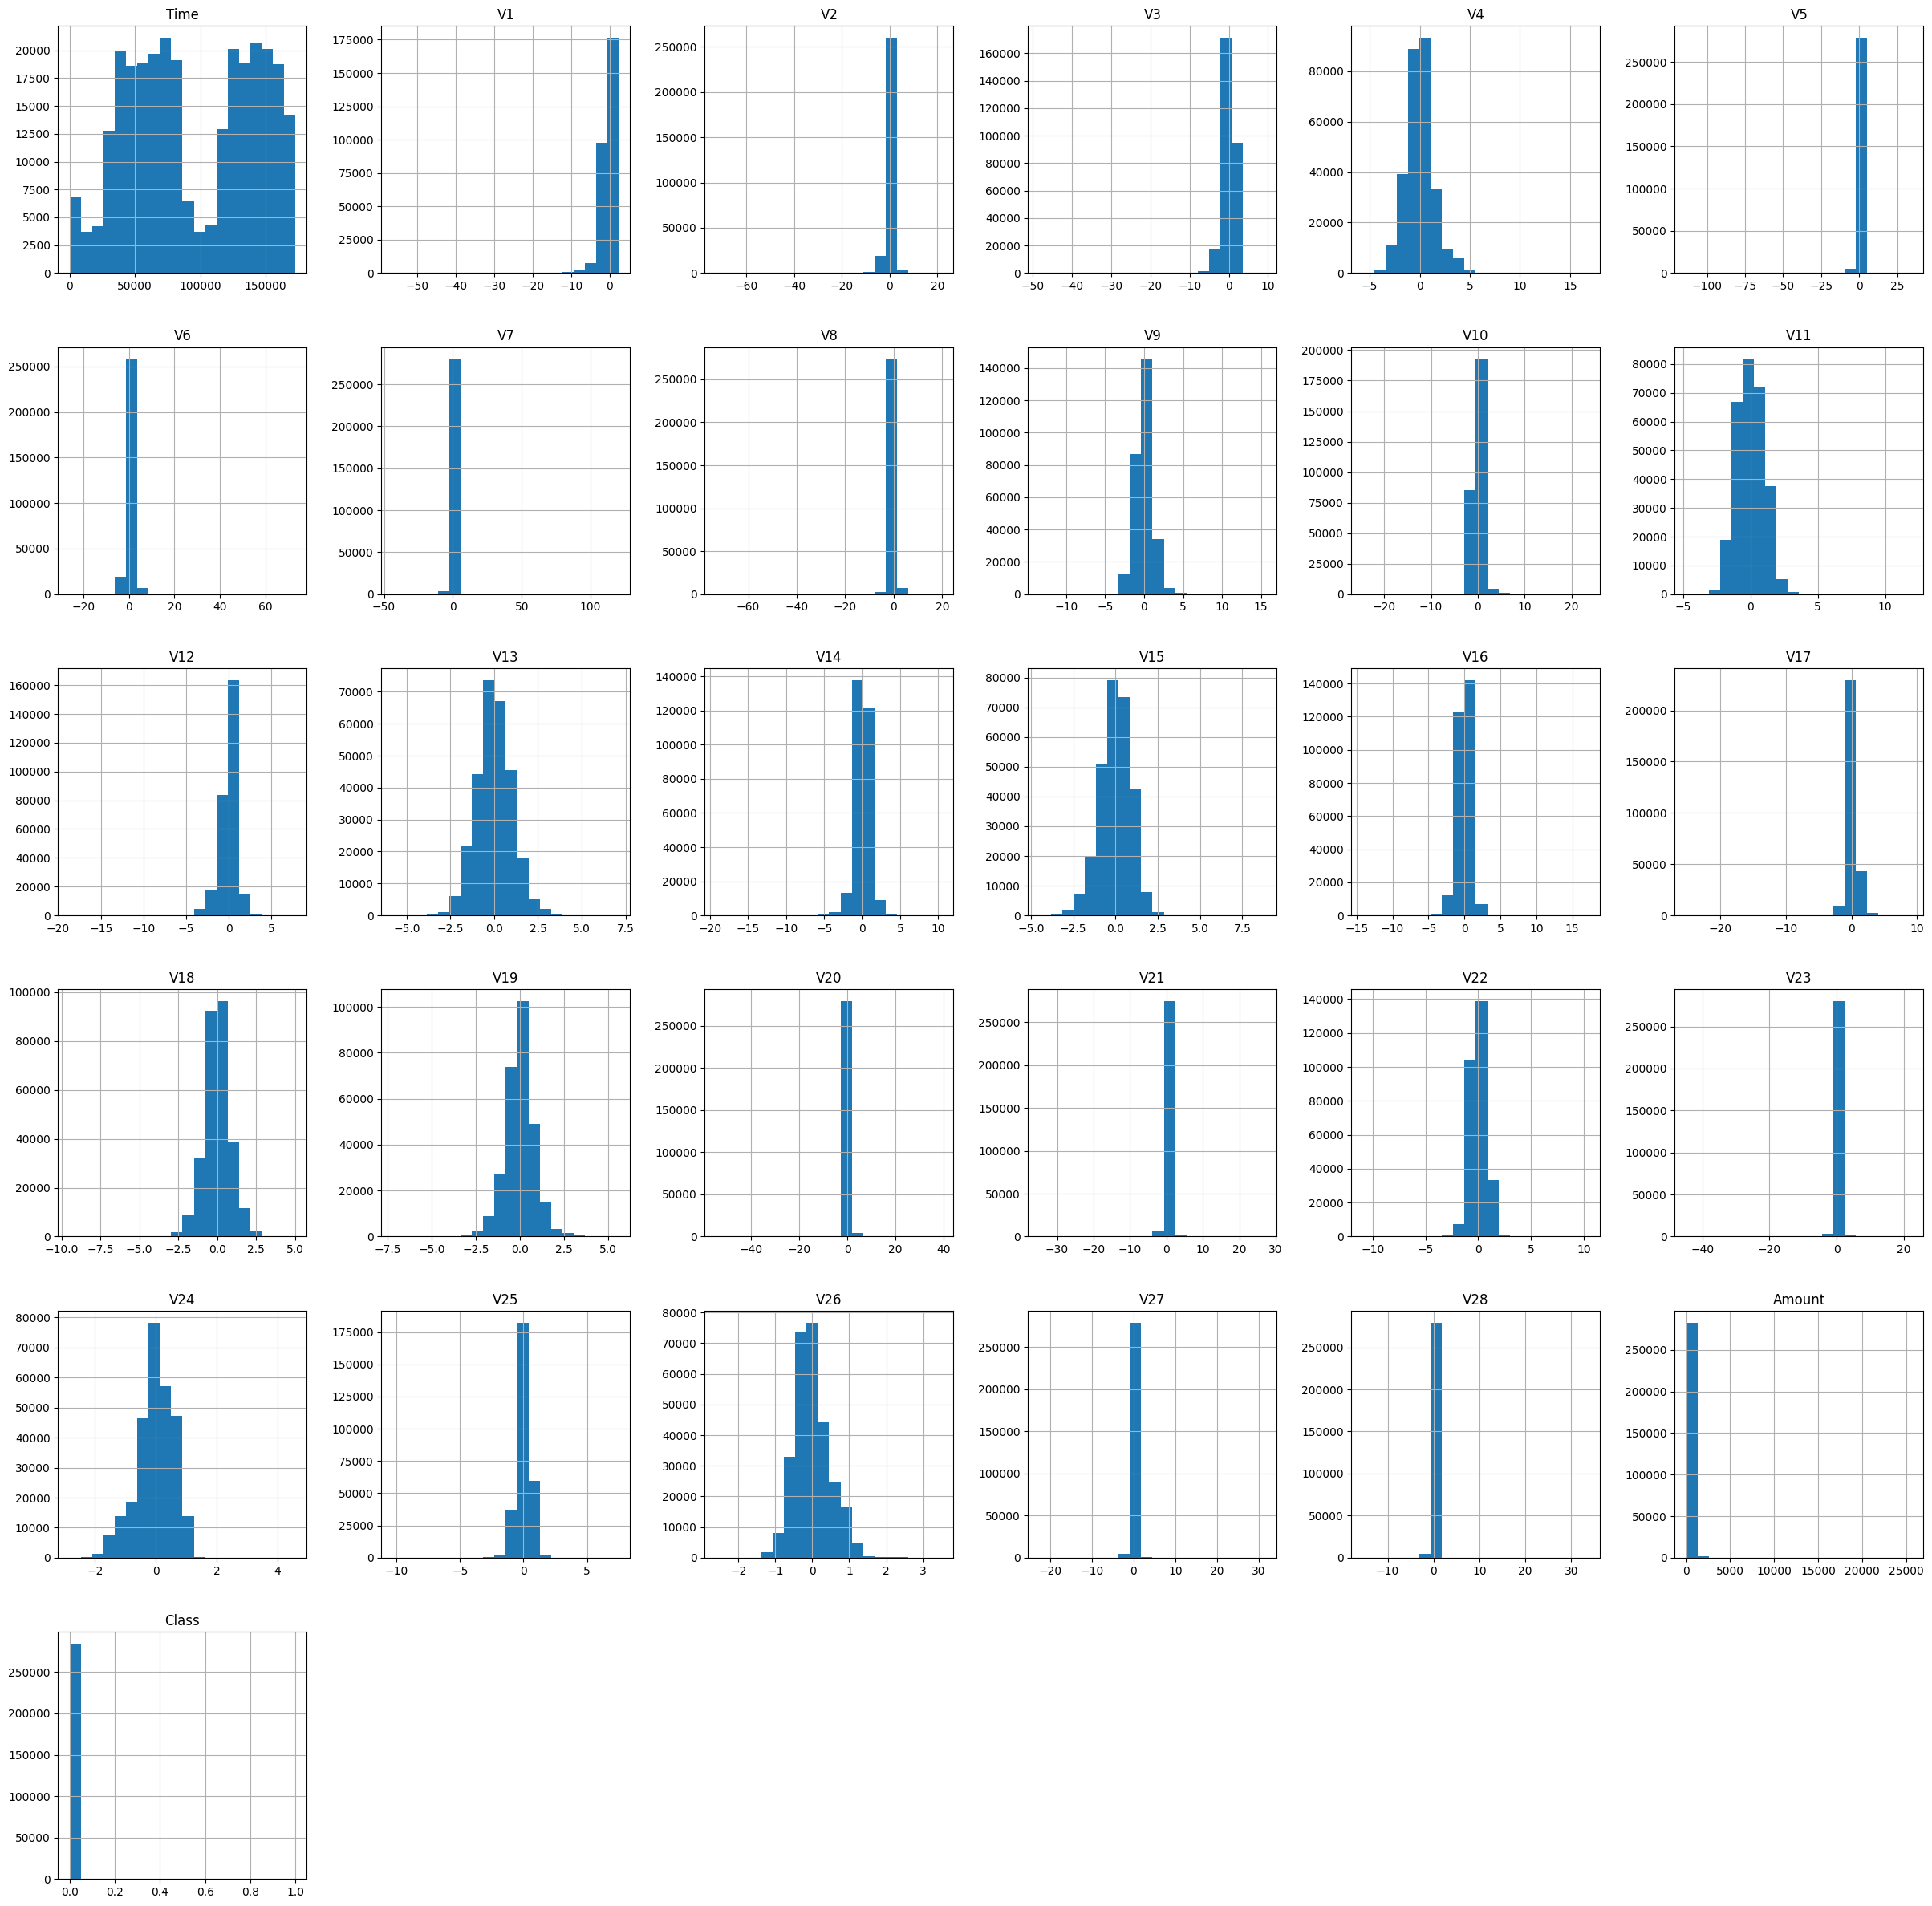

In [ ]:
data.hist(bins=20,figsize=(30,30))
plt.title("Histograms")
plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

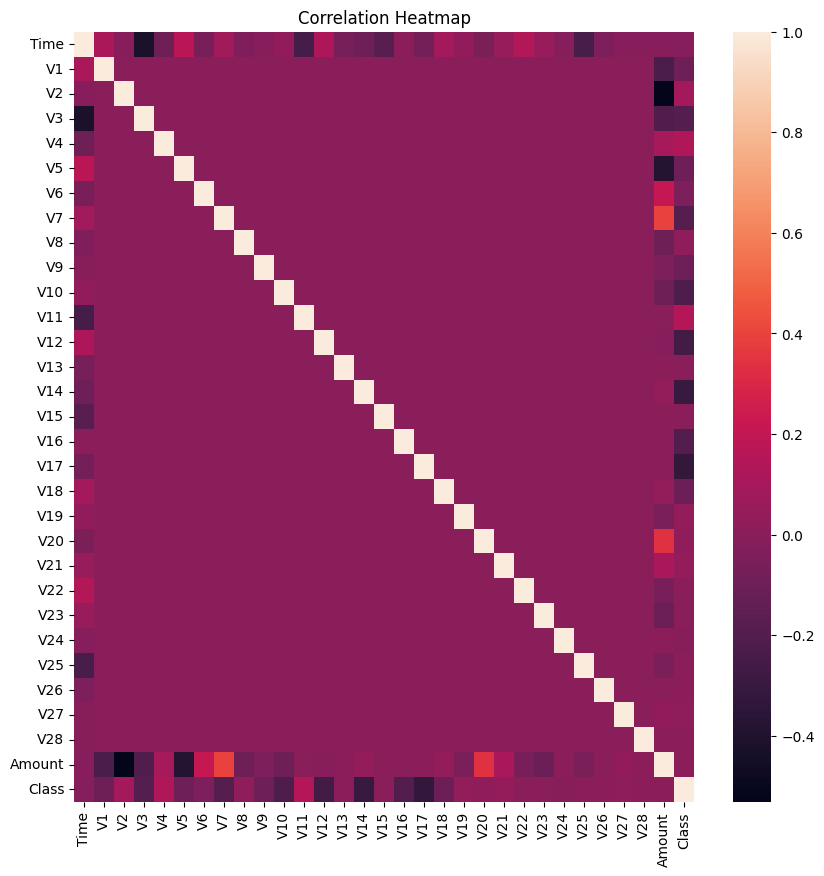

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap')
sb.heatmap(data.corr(),annot=False)


### Feature Engineering

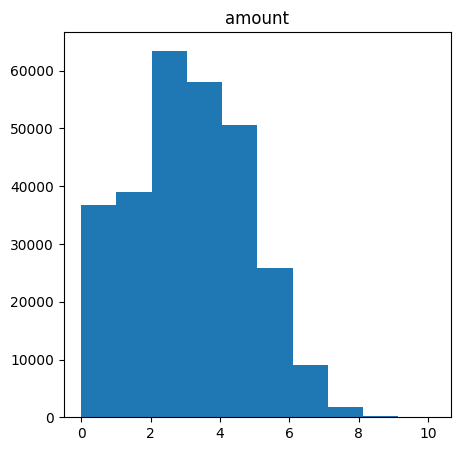

In [ ]:
data['LogAmount']=np.log1p(data['Amount'])
plt.figure(figsize=(5,5))
plt.title("amount")
plt.hist(data['LogAmount'])
plt.show()

In [ ]:
""" #interquartile range used to remove outliers
def outlier_removal(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1               #interquartile range
    lq=q1- 1.5*iqr    #lower quartile
    uq=q3- 1.5*iqr    #upper quartile
    return df[df[col]>=lq & [df[col]<=uq]]

non_fraud=data(data['Amount']==0)
fraud=data(data['Amount']==1)
non_fraud_clean=outlier_removal(non_fraud,'Amount') """

#capping other features with outliers
outlier_features=['V5','V7','V20','V23','V27','V28']

for i in outlier_features:
    lb=data[i].quantile(0.01)
    ub=data[i].quantile(0.99)
    data[i]=data[i].clip(lower=lb,upper=ub)




In [ ]:
X=data.drop(['Class'],axis=1)
y=data['Class']

### Train Test Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
X_t,X_test,y_t,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
X_train,X_val,y_train,y_val=train_test_split(X_t,y_t,test_size=0.1,shuffle=True)
len(y_train),len(y_test),len(y_val)

(205060, 56962, 22785)

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42,k_neighbors=7)
X_r,y_r=sm.fit_resample(X_train,y_train)
y_r.value_counts()   #nearly eqaulizes instances from both class

Class
0    204703
1    204703
Name: count, dtype: int64

### Model Selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42,max_depth=5,class_weight='balanced')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_depth=10,bootstrap=True,min_samples_leaf=10,max_features='sqrt')
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200)

### Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score

scores_rf=cross_val_score(rf,X_train,y_train,cv=3)
scores_dtc=cross_val_score(dtc,X_train,y_train,cv=3)

print(np.mean(scores_rf))
print(np.mean(scores_dtc))


0.9993757926174295
0.9657174317551682


### Hyperparameter Tuning

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid= {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.2, 0.5, None],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
}

rs_rf= RandomizedSearchCV(
   estimator=rf,
    param_distributions=param_grid,
    n_iter=3,
    cv=3
)

rs_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    min_samples_leaf=10,
                                                    n_estimators=200),
                   n_iter=3,
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2', 0.2,
                                                         0.5, None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [100, 200, 300]})

In [ ]:
rs_rf.score(X_test,y_test)

0.9995084442259752

In [ ]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score

y_pred = rs_rf.best_estimator_.predict(X_test)
y_prob = rs_rf.best_estimator_.predict_proba(X_test)[:, 1]

print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


F1 Score: 0.8426966292134831
ROC AUC: 0.9880921947704666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.86      0.82      0.84        91

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))
